# 1. IMPORTS

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.api as statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import wquantiles
import math

# 2. LOAD DATA

In [2]:
# define path
path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv'

# load data
df1 = pd.read_csv(path)
df1.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
# data shape
df1.shape

(50, 4)

# 3. EXAMPLES

## Example: Location Estimates of Population and Murder Rates

In [4]:
# population mean
df1['Population'].mean()

6162876.3

In [5]:
# population trimmed mean
stats.trim_mean(df1['Population'], 0.1)

4783697.125

Trimmed Mean takes half of the trim in the beggining and other half in the end  (5%/5%)

In [6]:
# population median
df1['Population'].median()

4436369.5

In [7]:
# muderder rate weighted mean
round(np.average(df1['Murder.Rate'], weights=df1['Population']), 2)

4.45

In [8]:
# muderder rate weighted median
wquantiles.median(df1['Murder.Rate'], weights=df1['Population'])

4.4

In [9]:
dict_pop_murd = {
    'state': ['SP', 'RJ', 'MG', 'BA'],
    'population': [37, 22, 21, 6],
    'murder_rate': [4.4, 4.1, 5.8, 3.4]
}


pop = pd.DataFrame(dict_pop_murd)
pop

,state,population,murder_rate
0,SP,37,4.4
1,RJ,22,4.1
2,MG,21,5.8
3,BA,6,3.4


In [10]:
# Murder rate mean
round(pop['murder_rate'].mean(), 2)

4.42

In [11]:
# Murder rate weighted mean
round(np.average(pop['murder_rate'], weights=pop['population']), 2)

4.6

## Example: Variability Estimates of State Population

In [12]:
# Std dev of population
math.ceil(df1['Population'].std())

6848236

In [13]:
# IQR of population
math.ceil(df1['Population'].quantile(.75) - df1['Population'].quantile(.25))

4847308

In [14]:
# Mean absolute deviation (MAD) of population
math.ceil(statsmodels.robust.scale.mad(df1['Population']))

3849877

## Example: Boxplots and Percentiles

In [15]:
# Takes quantiles 
pcts = pd.DataFrame(df1['Murder.Rate'].quantile([0.05, 0.25, 0.50, 0.75, 0.95])).reset_index()

# Rename columns
pcts.columns = ['quantile', 'murder_rate']

pcts

,quantile,murder_rate
0,0.05,1.600
1,0.25,2.425
2,0.50,4.000
3,0.75,5.550
4,0.95,6.510


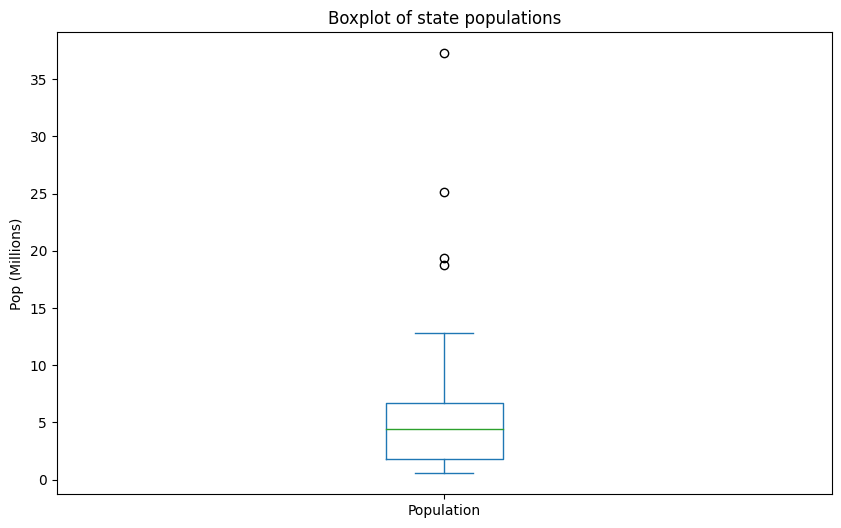

In [16]:
# Sets figure size
plt.figure(figsize=(10, 6))

# Plotting chart
ax = (df1['Population']/1000000).plot.box()

# Rename plot and axis
ax.set_title('Boxplot of state populations')
ax.set_ylabel('Pop (Millions)')
plt.show()

## Example: Frequency Tables and Histograms

In [17]:
# create a dataframe with cut method and count the number of states within each interval
binned_pop = pd.cut(df1['Population'], bins=5, include_lowest=True).value_counts().reset_index()
binned_pop

,Population,count
0,"(526935.669, 7901692.0]",38
1,"(7901692.0, 15239758.0]",8
2,"(15239758.0, 22577824.0]",2
3,"(22577824.0, 29915890.0]",1
4,"(29915890.0, 37253956.0]",1


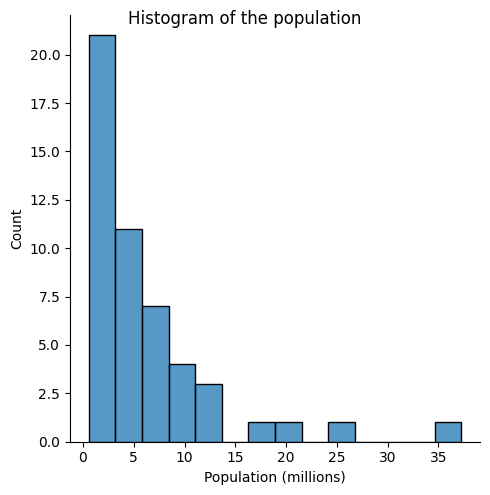

In [18]:
# Plotting histogram
ax = sns.displot(df1['Population']/1000000)

# Set histogram title
ax.fig.suptitle('Histogram of the population')
ax.set_xlabels('Population (millions)')

plt.show()

## Example: Density of state murder rates

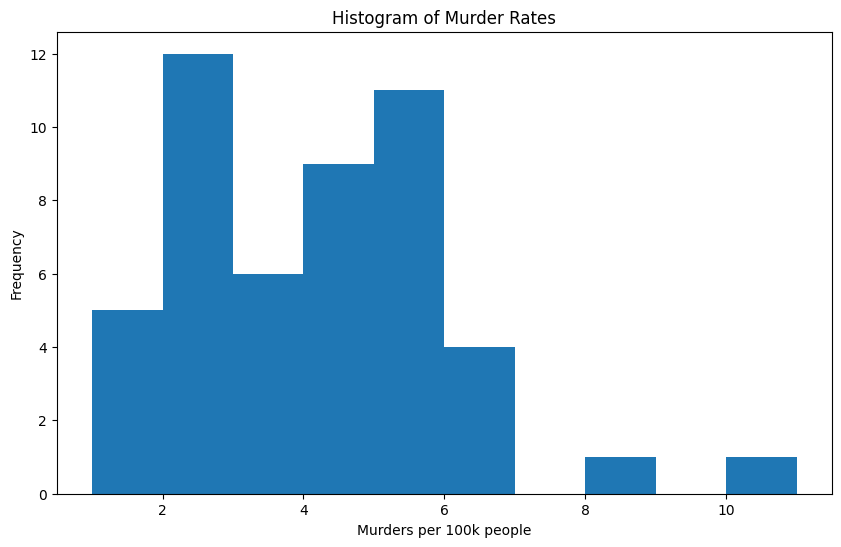

In [19]:
# First, let's check the histogram of murder rates
ax = df1['Murder.Rate'].plot.hist(figsize=(10, 6), bins=range(1, 12))

ax.set_title('Histogram of Murder Rates')
ax.set_xlabel('Murders per 100k people')

plt.show()

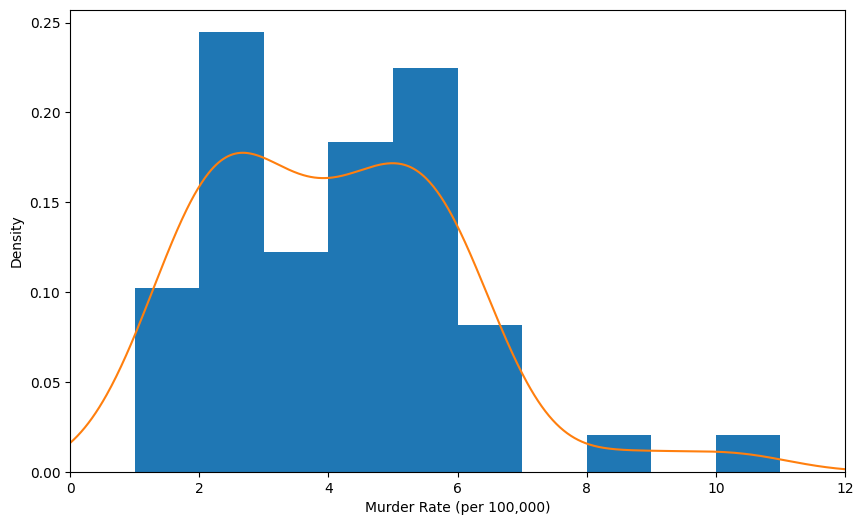

In [20]:
# Creating histogram object first
ax = df1['Murder.Rate'].plot.hist(figsize=(10, 6), density=True, bins=range(1, 12), xlim=[0, 12])

# Now, setting density
df1['Murder.Rate'].plot.density(ax=ax)

# Renaming x-axis
ax.set_xlabel('Murder Rate (per 100,000)')

plt.show()

## Example: Percentage of delays by cause at Dallas/Fort Worth Airport

In [21]:
# Retrieving data and saving into lists
reasons = ["Carrier","ATC","Weather","Security","Inbound"]
amounts = [64263.16,84856.5,11235.42,343.15,118427.82]

# Creating DataFrame
df_dwf = pd.DataFrame(index=reasons, data=amounts, columns=['Reasons'])

# Creating total 
totals = df_dwf.values.sum()

# Iterate over dataframe, locate index, retrieve the value column reason and divide by totals. Save it on the same row as index, but in Percentage column
for index, row in df_dwf.iterrows():
  df_dwf.loc[index, 'Percentage'] = round((df_dwf.loc[index, 'Reasons']/totals) * 100, 2)

df_dwf.T.loc['Percentage', :]

Carrier     23.02
ATC         30.40
Weather      4.03
Security     0.12
Inbound     42.43
Name: Percentage, dtype: float64

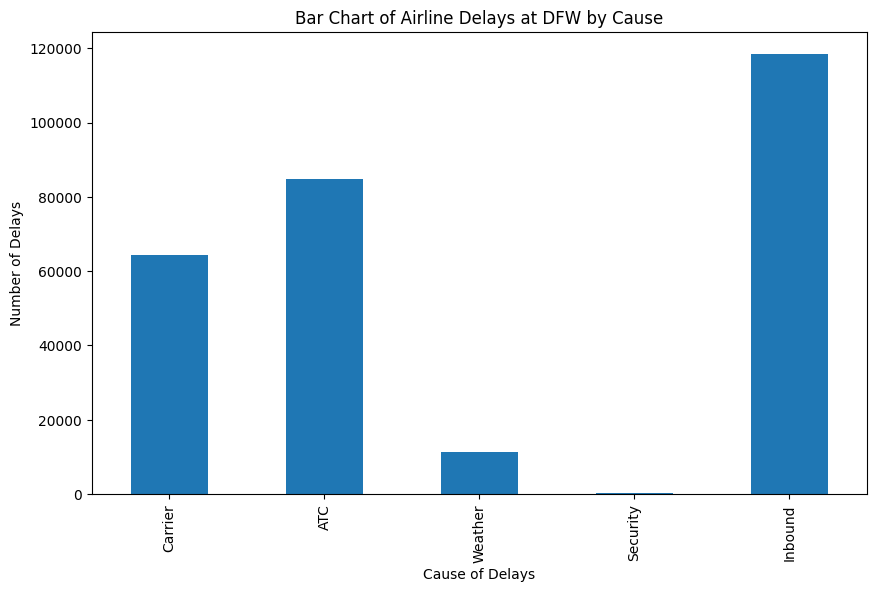

In [22]:
# Plotting bar chart
ax = df_dwf.T.loc['Reasons', :].plot.bar(figsize=(10, 6))

# Sets the titles
ax.set_title('Bar Chart of Airline Delays at DFW by Cause')
ax.set_ylabel('Number of Delays')
ax.set_xlabel('Cause of Delays')

plt.show()

## Example: Correlation between ETF Returns

In [25]:
# Creating stock prices variation dataframe
path1 = 'data/sp500_data.csv'

# Creating sectors categorization dataframe
path2 = 'data/sp500_sectors.csv'

sp500 = pd.read_csv(path1)
sp500_sec = pd.read_csv(path2)

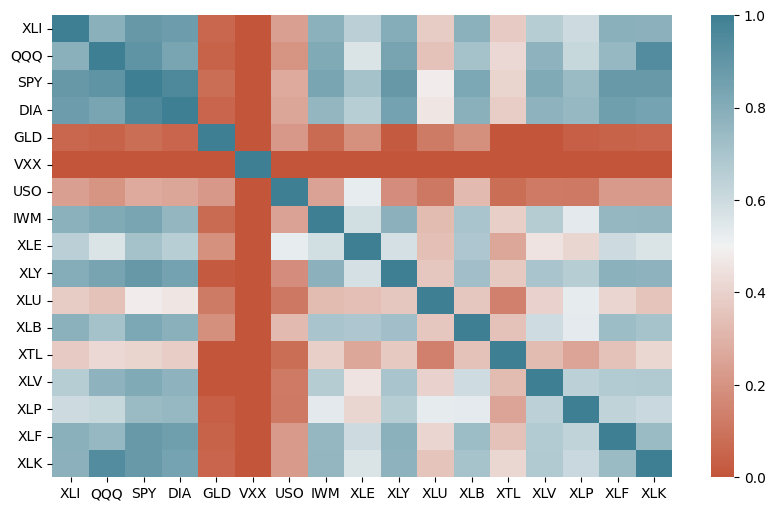

In [26]:
# Filters data and companies of ETF sector (brought by sp500 table)
etfs = sp500.loc[sp500['Unnamed: 0'] > '2012-07-01', sp500_sec[sp500_sec['sector'] == 'etf']['symbol']]

# Sets figure size
plt.figure(figsize=(10, 6))

# Plotting heatmap chart with etfs correlation
ax = sns.heatmap(etfs.corr(), vmin=0, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

plt.show()

## Example: Scatterplot of correlation between returns for ATT and Verizon

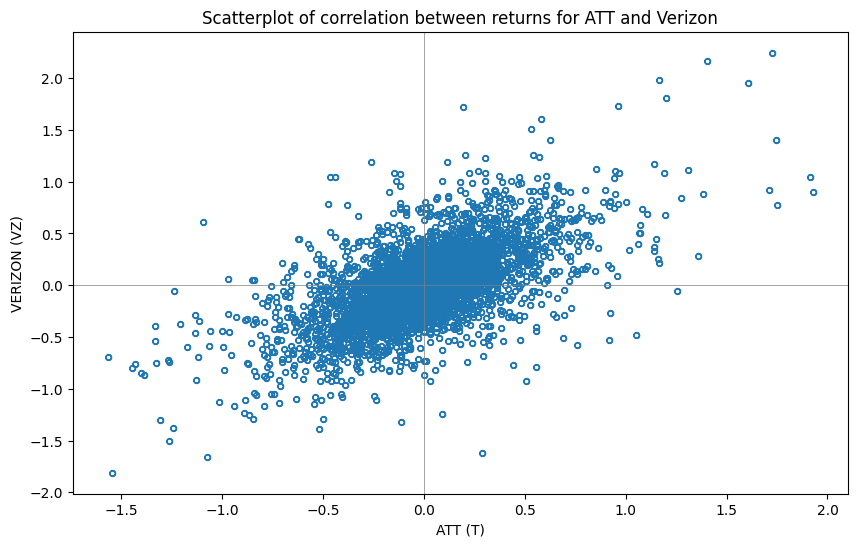

In [28]:
# Plots the chart setting ATT in x-axis and VZ in y-axis
ax = sp500.plot.scatter(x='T', y='VZ', figsize=(10, 6), marker='$\u25EF$')

# Renaming axis and chart title
ax.set_title('Scatterplot of correlation between returns for ATT and Verizon')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('VERIZON (VZ)')

# Setting support line in 0 for x and y axis
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)

plt.show()

## Example: Hexagonal Binning

In [29]:
# Importing kc tax dataframe
path = 'data/kc_tax.csv'

kc_tax = pd.read_csv(path)
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


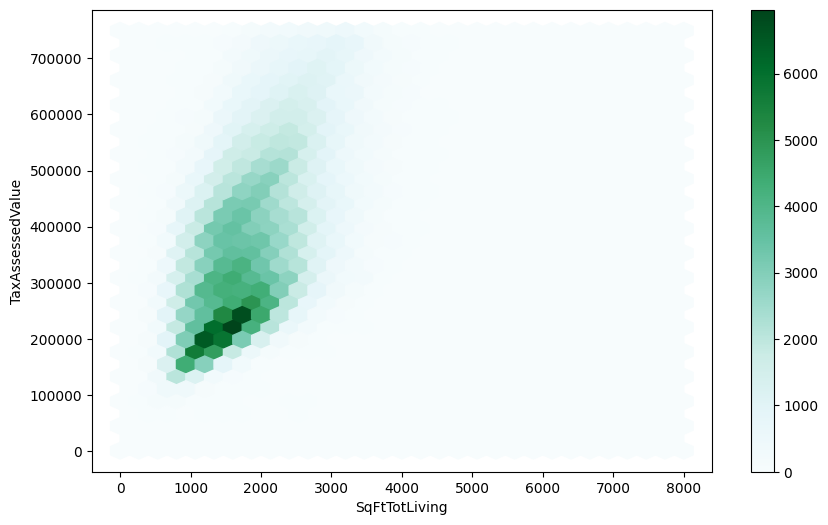

In [30]:
# Creating conditions to filter kc tax records
con1 = kc_tax['TaxAssessedValue'] < 750000
con2 = (kc_tax['SqFtTotLiving'] > 100) & kc_tax['SqFtTotLiving'] < 3500

# Filters the properties with the desired conditions
kc_tax0 = kc_tax.loc[con1 & con2, :]

# Naming axis
ax.set_title('Hexagonal binning for tax-assessed value versus finished square feet')
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(10,6))

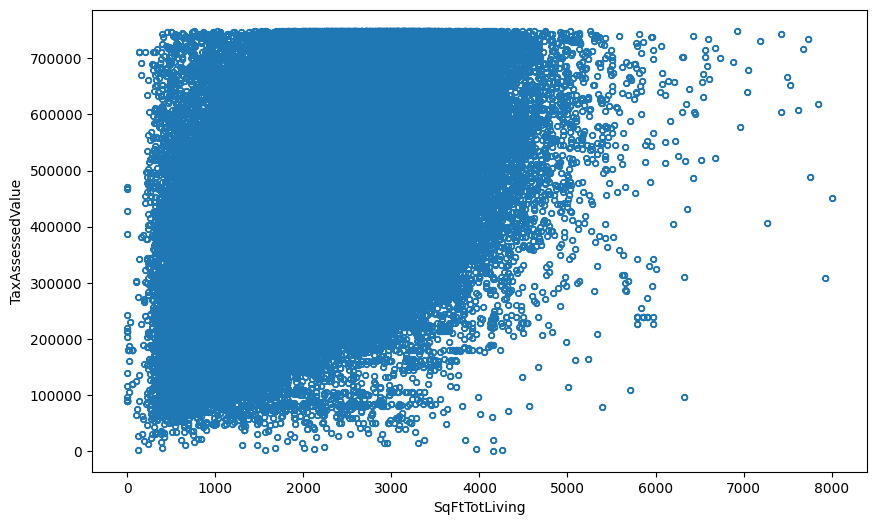

In [31]:
# While in the scatter plot, we have:
ax = kc_tax0.plot.scatter(x='SqFtTotLiving', y='TaxAssessedValue', figsize=(10,6), marker='$\u25EF$')

## Example: Contigency Table

In [ ]:
# Creating loans DataFrame
path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv'

loans = pd.read_csv(path)
loans.head()

In [ ]:
# Pivots loan DataFrame and sets the count of each grade per status. Margin argument returns the sums of rows and columns
crosstab = loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)

# Create a copy of DataFrame, ignoring the sums
df1 = crosstab.loc['A':'G', :].copy()

# Divide the row values by the total. Save it to main DataFrame
df1.loc[:, 'Charged Off':'Late'] = df1.loc[:, 'Charged Off':'Late'].div(df1['All'], axis=0)

# Divide values on "All" column the the sum of the column to get the proportion
df1['All'] = df1['All']/sum(df1['All'])

df1 * 100

## Example: Boxplot of flight delay per air company

In [ ]:
path = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv'

# Creating Dataframe
airline_status = pd.read_csv(path)
airline_status.head()

In [ ]:
# Plots plots boxplot
ax = airline_status.boxplot(by='airline', column='pct_carrier_delay', figsize=(10,6))

ax.set_xlabel('Airline')
ax.set_ylabel('Daily Pct of delays')
plt.suptitle('')

plt.show()

## Example: Violin plot of airline delays

In [ ]:
# Figure size
plt.figure(figsize=(10,6))

# Plotting violin plot
ax = sns.violinplot(x=airline_status['airline'], y=airline_status['pct_carrier_delay'], inner='quartile', color='white')

ax.set_xlabel = ('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.show()